# Exploratory Data Analysis (EDA)

### What is Exploratory Data Analysis (EDA)?
EDA is a crucial first step in the data analysis process. It involves summarizing, visualizing, and understanding the data to uncover patterns, identify anomalies, and form hypotheses.

#### Key Objectives of EDA:
- **Understand the data structure:** What columns exist? What do they represent?
- **Spot data issues:** Missing values, duplicates, inconsistencies.
- **Find relationships:** Between variables (e.g., correlations, trends).
- **Guide the next steps:** Data cleaning, feature engineering, model building.`

#### Why is EDA Important?
- **Communicating insights:** Simplify complex datasets into actionable knowledge.
- **Identifying trends:** Spot outliers or unexpected patterns early.
- **Ensuring data quality:** Clean and preprocess data for further analysis.
- **Avoiding biases:** Avoid jumping to conclusions without evidence.

In [1]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Read the data
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/data_science_salaries.csv'

In [4]:
df =pd.read_csv(file_path)
df.tail(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,bonus
2574,2021,SE,FT,Director of Data Science,168000,USD,182095.93070,JP,0,JP,S,14095.930740
2575,2021,MI,FT,Data Scientist,160000,SGD,136450.11560,SG,100,IL,M,17391.115570
2576,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,506266.35180,US,50,US,L,83266.351760
2577,2021,MI,FT,Data Engineer,24000,EUR,32355.52435,MT,50,MT,L,3986.524346
2578,2021,SE,FT,Data Specialist,165000,USD,182105.89860,US,100,US,L,17105.898580
2579,2020,SE,FT,Data Scientist,412000,USD,472635.11820,US,100,US,L,60635.118160
2580,2021,MI,FT,Principal Data Scientist,151000,USD,161334.15340,US,100,US,L,10334.153370
2581,2020,EN,FT,Data Scientist,105000,USD,124246.38050,US,100,US,S,19246.380510
2582,2020,EN,CT,Business Data Analyst,100000,USD,112546.25930,US,100,US,L,12546.259260
2583,2021,SE,FT,Data Science Manager,7000000,INR,105778.90400,IN,50,IN,L,11113.904000


In [ ]:
# Basic Statistics and Overview of Data
df.shape

(2584, 12)

In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'bonus'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           2584 non-null   int64  
 1   experience_level    2584 non-null   object 
 2   employment_type     2582 non-null   object 
 3   job_title           2584 non-null   object 
 4   salary              2584 non-null   int64  
 5   salary_currency     2584 non-null   object 
 6   salary_in_usd       2584 non-null   float64
 7   employee_residence  2584 non-null   object 
 8   remote_ratio        2584 non-null   int64  
 9   company_location    2584 non-null   object 
 10  company_size        2584 non-null   object 
 11  bonus               2577 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 242.4+ KB


In [ ]:
df.describe(include= ['float', 'int'])

,work_year,salary,salary_in_usd,remote_ratio,bonus
count,2584.000000,2.584000e+03,2584.000000,2584.000000,2577.000000
mean,2022.301084,2.103653e+05,150024.565973,50.483746,16591.133045
std,0.749179,8.080375e+05,75791.011228,48.163707,10678.466918
min,2020.000000,6.000000e+03,5810.419215,0.000000,350.194419
25%,2022.000000,9.000000e+04,94812.558850,0.000000,8746.856741
50%,2022.000000,1.346300e+05,144188.260400,50.000000,14448.961280
75%,2023.000000,1.825625e+05,197622.887200,100.000000,22301.243040
max,2023.000000,3.040000e+07,531474.655100,100.000000,83266.351760


In [ ]:
df.describe(include= ['object'])

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,2584,2582,2584,2584,2584,2584,2584
unique,4,4,93,20,78,72,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,1554,2545,598,2107,1893,1929,2028


## Missing Value


In [ ]:
missing_value =df.isna().sum()
missing_value

,0
work_year,0
experience_level,0
employment_type,2
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [ ]:
!pip install missingno

In [ ]:
import missingno as msno

<Axes: >

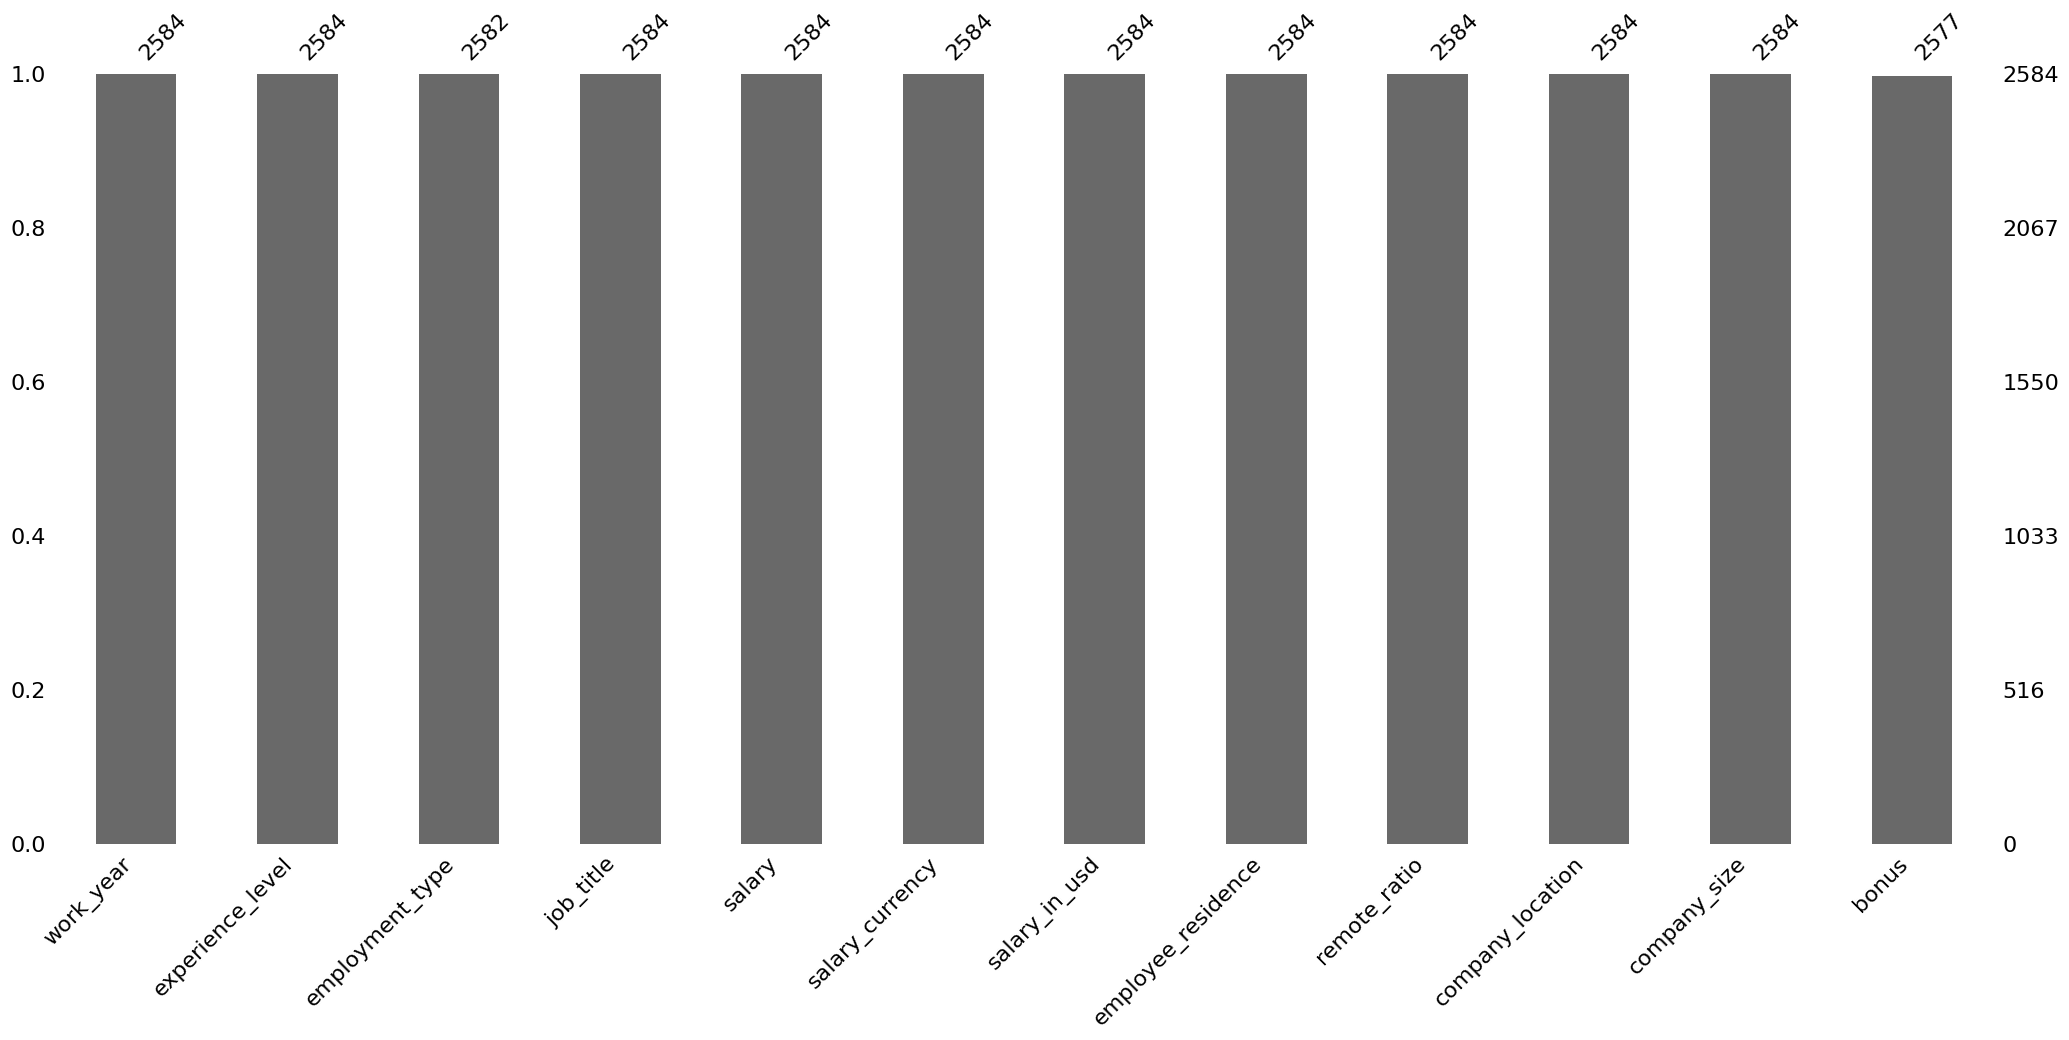

In [ ]:
msno.bar(df)

<Axes: >

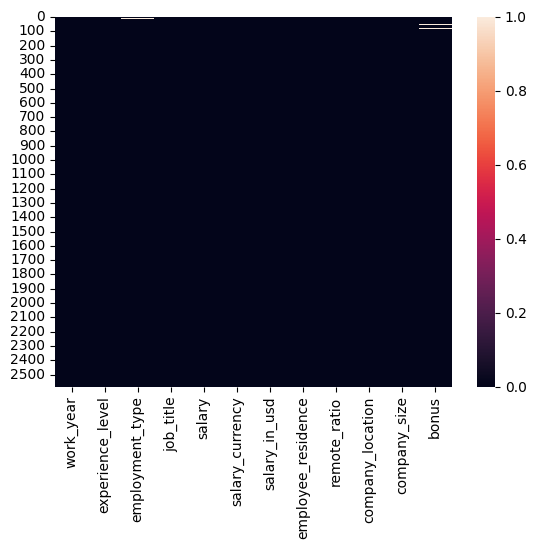

In [ ]:
sns.heatmap(df.isna())

### Handling missing values

In [ ]:
df['bonus'] =df['bonus'].fillna(df['bonus'].mean())
df['bonus']

,bonus
0,9115.321837
1,5778.214379
2,4074.876827
3,24464.785210
4,8808.335528
...,...
2579,60635.118160
2580,10334.153370
2581,19246.380510
2582,12546.259260


In [ ]:
Numerical_cols = df.select_dtypes(include = 'number').columns
Numerical_cols

Index(['work_year', 'salary', 'salary_in_usd', 'remote_ratio', 'bonus'], dtype='object')

In [ ]:
mean_value = df[Numerical_cols].mean()

In [ ]:
df[Numerical_cols] =df[Numerical_cols].fillna(mean_value)
df[Numerical_cols]

,work_year,salary,salary_in_usd,remote_ratio,bonus
0,2023,80000,94962.32184,100,9115.321837
1,2023,30000,35778.21438,100,5778.214379
2,2023,25500,29574.87683,100,4074.876827
3,2023,175000,199464.78520,100,24464.785210
4,2023,120000,128808.33550,100,8808.335528
...,...,...,...,...,...
2579,2020,412000,472635.11820,100,60635.118160
2580,2021,151000,161334.15340,100,10334.153370
2581,2020,105000,124246.38050,100,19246.380510
2582,2020,100000,112546.25930,100,12546.259260


In [ ]:
#Categorical data
df['employment_type'] = df['employment_type'].fillna(df['employment_type'].mode())
df['employment_type']

,employment_type
0,FT
1,CT
2,CT
3,FT
4,FT
...,...
2579,FT
2580,FT
2581,FT
2582,CT


In [ ]:
Cat_cols = df.select_dtypes(include = 'object').columns
Cat_cols

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
mode_value = df[Cat_cols].mode()

In [ ]:
df[Cat_cols] =df[Cat_cols].fillna(mode_value)
df[Cat_cols]

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
0,SE,FT,Principal Data Scientist,EUR,ES,ES,L
1,MI,CT,ML Engineer,USD,US,US,S
2,MI,CT,ML Engineer,USD,US,US,S
3,SE,FT,Data Scientist,USD,CA,CA,M
4,SE,FT,Data Scientist,USD,CA,CA,M
...,...,...,...,...,...,...,...
2579,SE,FT,Data Scientist,USD,US,US,L
2580,MI,FT,Principal Data Scientist,USD,US,US,L
2581,EN,FT,Data Scientist,USD,US,US,S
2582,EN,CT,Business Data Analyst,USD,US,US,L


In [ ]:
df.duplicated().sum()

0

### Univariate

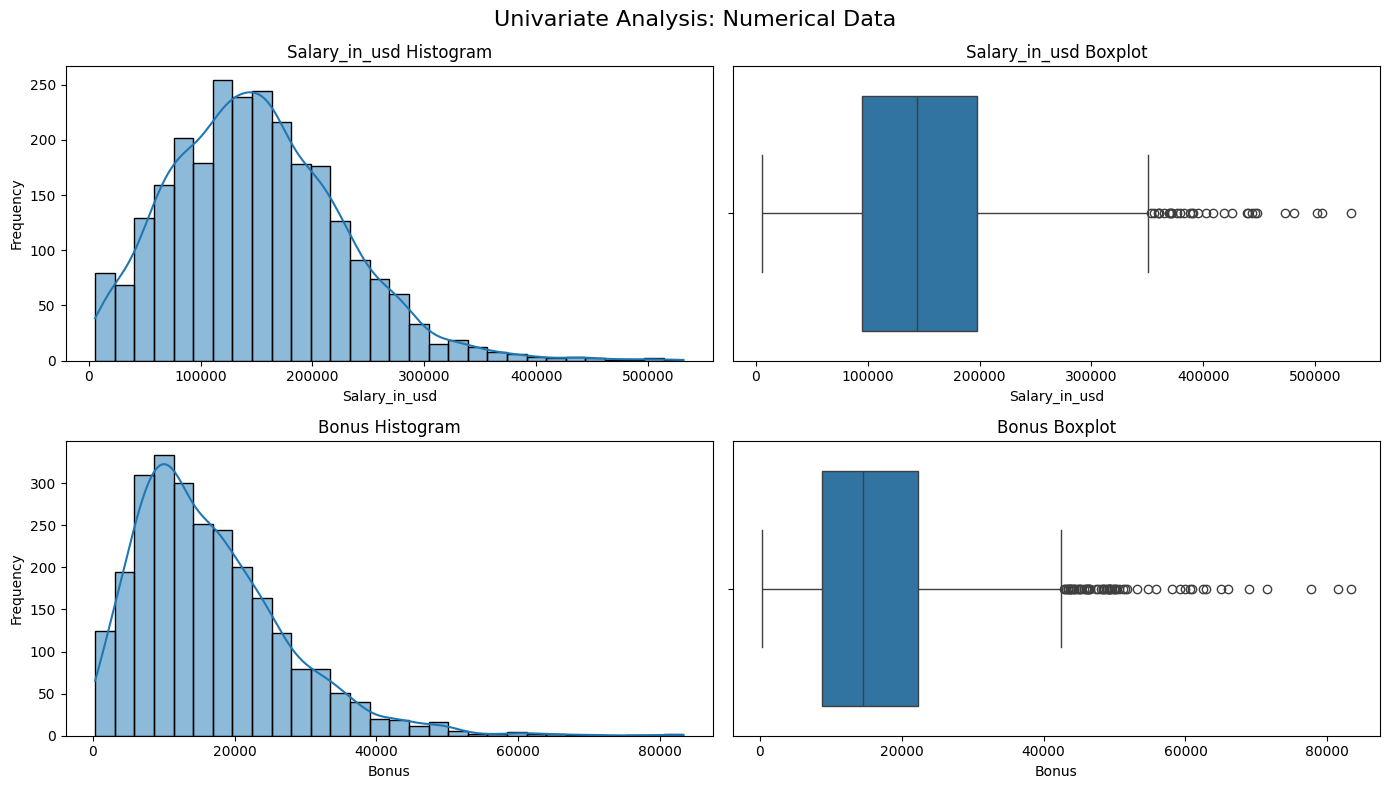

In [ ]:
numerical_column = ['salary_in_usd', 'bonus']


# Set up subplots for numerical analysis
fig, axes = plt.subplots(len(numerical_column), 2, figsize=(14, 8))
fig.suptitle("Univariate Analysis: Numerical Data", fontsize=16)

for i, column in enumerate(numerical_column):
    # Histogram
    sns.histplot(df[column], bins= 30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"{column.capitalize()} Histogram")
    axes[i, 0].set_xlabel(column.capitalize())
    axes[i, 0].set_ylabel("Frequency")

    # Boxplot
    sns.boxplot(x=df[column], ax=axes[i, 1])
    axes[i, 1].set_title(f"{column.capitalize()} Boxplot")
    axes[i, 1].set_xlabel(column.capitalize())

plt.tight_layout()
plt.show()



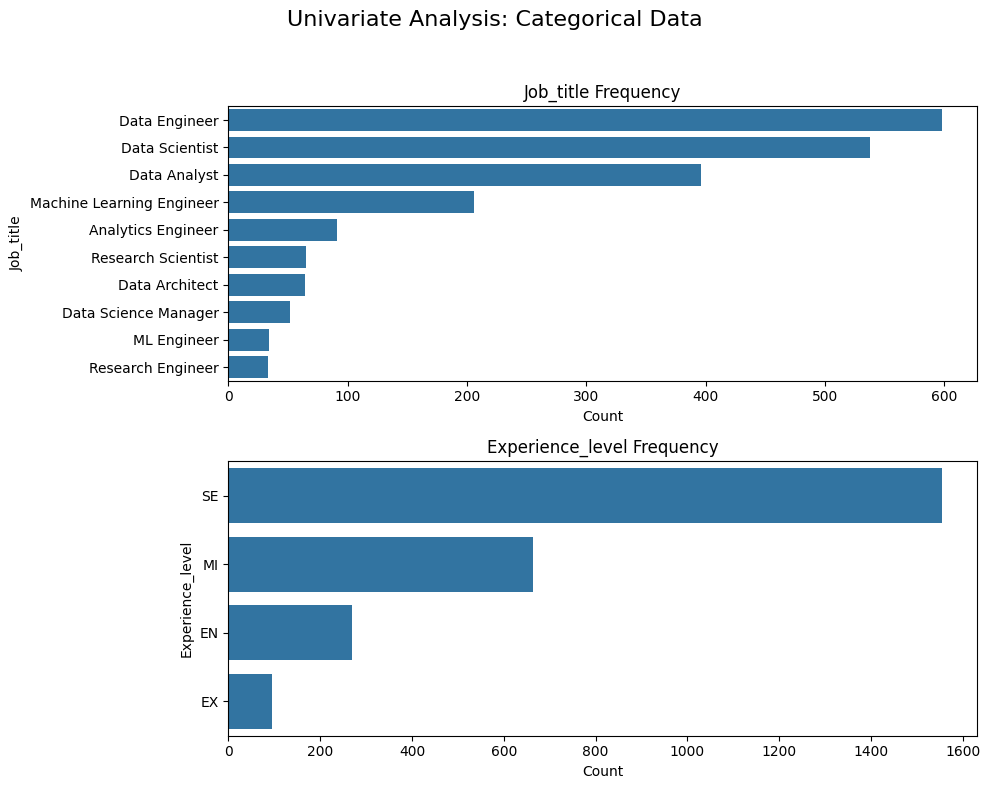

In [ ]:
# Major Categorical Columns
cat_cols = ['job_title', 'experience_level']

# Set up subplots for categorical analysis
fig, axes = plt.subplots(len(cat_cols), 1, figsize=(10, 8))
fig.suptitle("Univariate Analysis: Categorical Data", fontsize=16)

for i, column in enumerate(cat_cols):
    sns.countplot(data=df, y=column, order=df[column].value_counts().head(10).index, ax=axes[i])
    axes[i].set_title(f"{column.capitalize()} Frequency")
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel(column.capitalize())

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### EDA 1: Initial Exploration
In this step, we’ll explore the dataset's structure, inspect the columns, and identify potential issues. The goal is to gain a deeper understanding of the data before proceeding to advanced analysis.

##### Exploring the Structure of the Dataset

##### Dealing with Missing Values
In this step, we'll handle any missing or null values in the dataset. Missing data can impact analysis and must be addressed before proceeding with further exploratory and statistical analysis.

##### Strategies for Handling Missing Values
- **Drop Rows or Columns:**
    - If missing values are few and unimportant, dropping them is a quick solution.
- **Impute Missing Values:**
    - Numerical Columns: Use the mean, median, or mode.
    - Categorical Columns: Replace with the most frequent value or a placeholder like "Unknown".

##### Data Analysis

### Univariate Analysis

### Bivariate Analysis: Analyzing Relationships Between Two Variables
Bivariate analysis involves examining the relationship between two variables, which could either be numerical or categorical.

##### Steps for Bivariate Analysis:
**Numerical vs Numerical:**
- Scatter plots: To check for linear or non-linear relationships between two numerical variables.
- Correlation Matrix: To check the strength and direction of relationships between numerical variables.

**Categorical vs Numerical:**
- Boxplots: To check how a numerical variable behaves across different categories in a categorical variable (e.g., how salary_in_usd varies across experience_level).

**Categorical vs Categorical:**
- Grouped Bar Plots: To compare the counts of categories across different levels of another categorical variable (e.g., how job_title varies by company_size).

### Numerical vs Numerical


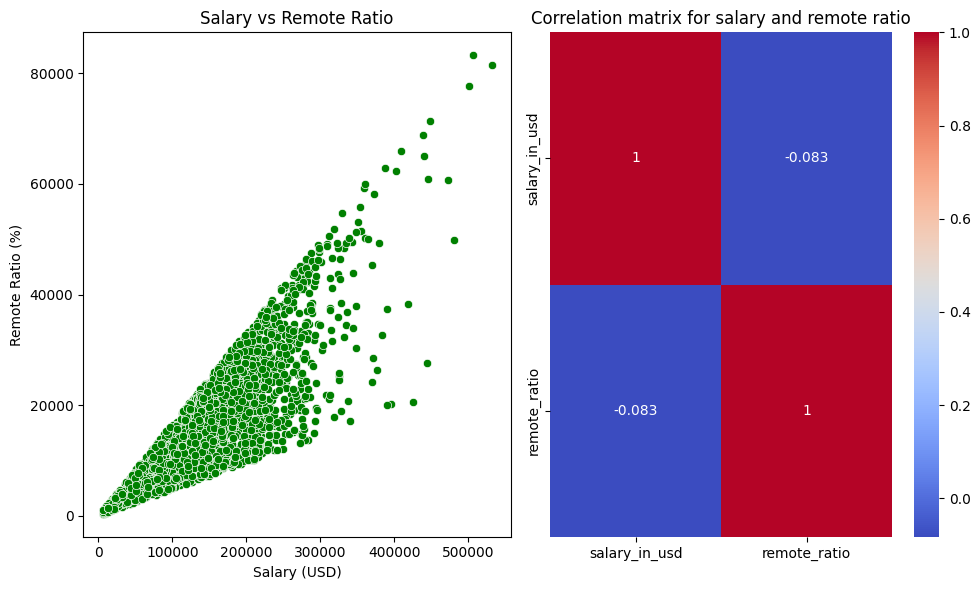

In [8]:
fig, axes = plt.subplots(1, 2, figsize = (10,6))

sns.scatterplot(data=df, x='salary_in_usd', y='bonus', ax=axes[0], color='green')
axes[0].set_title('Salary vs Remote Ratio')
axes[0].set_xlabel('Salary (USD)')
axes[0].set_ylabel('Remote Ratio (%)')

#correlation
correlation_matrix = df[['salary_in_usd', 'remote_ratio']].corr()
sns.heatmap(correlation_matrix, annot = True, cmap ='coolwarm', ax = axes[1])
axes[1].set_title("Correlation matrix for salary and remote ratio")

plt.tight_layout()
plt.show()

## Categorical vs Numerical

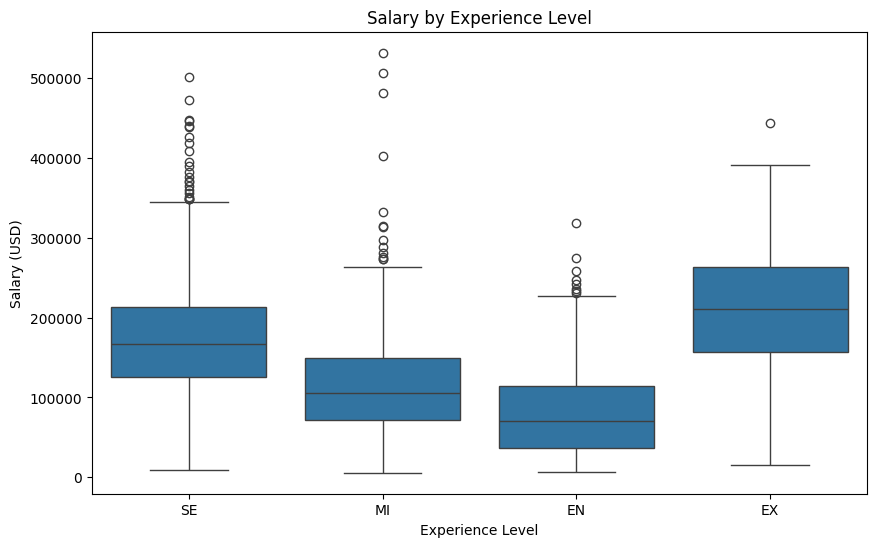

In [10]:
plt.figure(figsize = (10,6))

sns.boxplot(data =df, x = 'experience_level', y = 'salary_in_usd')
plt.title('Salary by Experience Level')
plt.ylabel('Salary (USD)')
plt.xlabel('Experience Level')
plt.show()

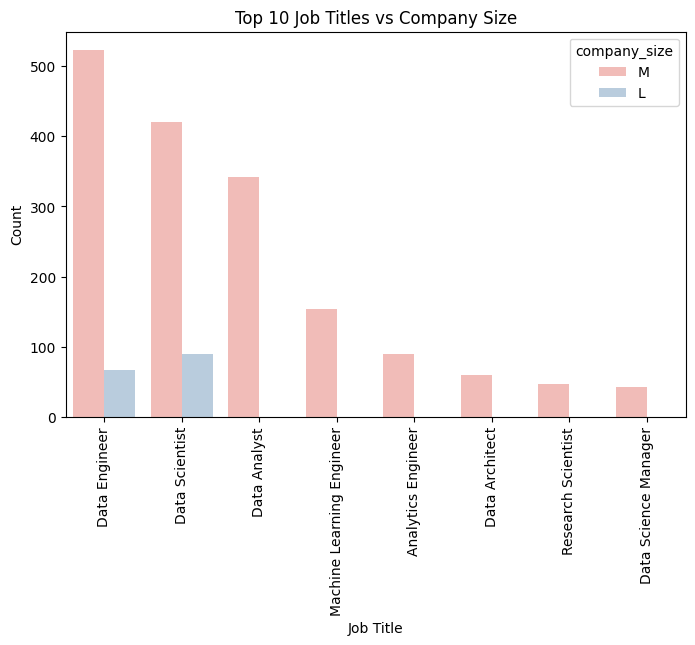

In [14]:

job_title_counts = df.groupby(['job_title', 'company_size']).size().reset_index(name='count')
job_title_counts_sorted = job_title_counts.sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(data=job_title_counts_sorted, x='job_title', y='count', hue='company_size', palette='Pastel1')
plt.title('Top 10 Job Titles vs Company Size')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation =90)
plt.show()

### Multivariate Analysis Overview
Multivariate analysis involves analyzing multiple variables simultaneously to uncover relationships and patterns between them. This can be achieved using various visualizations and aggregation methods.

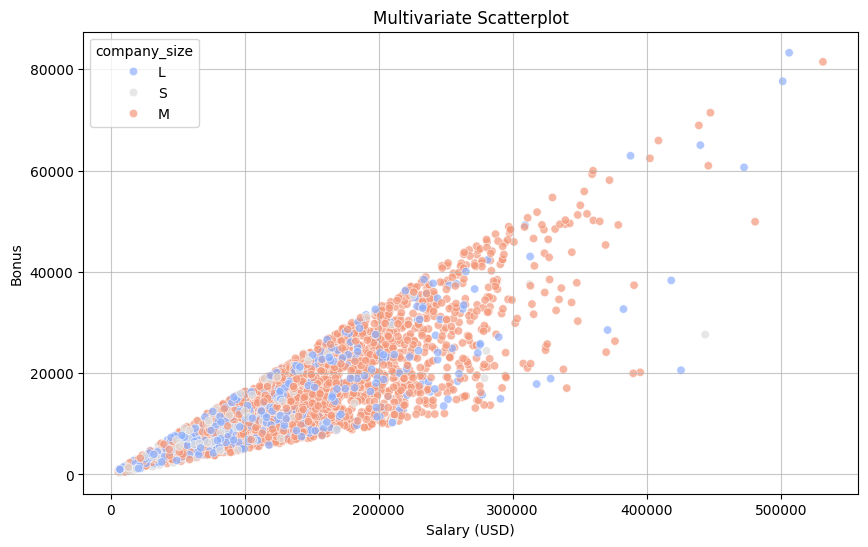

In [18]:
plt.figure(figsize = (10,6))
sns.scatterplot(data=df,  x='salary_in_usd', y='bonus', hue='company_size', sizes=(20, 200), palette='coolwarm',alpha=0.7)

plt.title('Multivariate Scatterplot')
plt.xlabel('Salary (USD)')
plt.ylabel('Bonus')
plt.legend(title = 'company_size')
plt.grid(alpha = 0.7)
plt.show()